# Experiment 01

First Tests from the predictions.

In [1]:
import numpy as np
import pandas as pd
import math

import sys
sys.path.insert(1, 'C:\\Users\\Adrion\\Desktop\\TG\\DayTradeSystem\\Part1_Prediction')
import Utils 
from Utils import calculateEMA, calculateBB, addPreviousDays, removeColumns, getPeriod, mape, mae, createDate, getDate, printResult

import matplotlib.pyplot as plt
import matplotlib.dates as mpdates
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

import warnings
warnings.filterwarnings('ignore')


def getPeriod2(df, begin, end, resetIndex = False):
    """
    Returns the df in the chosen interval
    
    Object begin: Start date forrmated as 'yyyy.mm.dd'.
    Object   end: End date 'yyyy.mm.dd'.

    returns a dataframe with the historic of the selected period
    """
    
    indexBegin = df[df['date']==begin].index[0]
    indexEnd = df[df['date']==end].tail(1).index[0]
    
    if (resetIndex):
        return df[(df.index >= indexBegin) & (df.index <= indexEnd)].reset_index(drop=True)
    else: 
        return df[(df.index >= indexBegin) & (df.index <= indexEnd)]

In [2]:
dfColumns = ['date','time','open', 'high', 'low','close','tickvol','volume','spread']
newColumns = ['open', 'high', 'low', 'close']

TEST_BEGIN = '2020.06.01'
TEST_END = '2021.06.01'

In [3]:
df = pd.read_csv('../Data/PETR4_M15.csv', sep = "\t")
df.columns = dfColumns
df = removeColumns(df, ['tickvol', 'volume','spread'])

df2 = pd.read_csv('../Data/VALE3_M15.csv', sep = "\t")
df2.columns = dfColumns
df2 = removeColumns(df2, ['tickvol', 'volume','spread'])

initialDf_PETR4 = getPeriod2(df, TEST_BEGIN, TEST_END)
initialDf_VALE3 = getPeriod2(df2, TEST_BEGIN, TEST_END)

In [4]:
initialDf_PETR4

,date,time,open,high,low,close
0,2020.06.01,10:00:00,19.50,19.59,19.38,19.59
1,2020.06.01,10:15:00,19.58,19.68,19.35,19.45
2,2020.06.01,10:30:00,19.46,19.67,19.35,19.64
3,2020.06.01,10:45:00,19.64,19.73,19.49,19.52
4,2020.06.01,11:00:00,19.52,19.74,19.48,19.68
...,...,...,...,...,...,...
7311,2021.06.01,15:45:00,27.14,27.14,27.05,27.06
7312,2021.06.01,16:00:00,27.06,27.09,27.01,27.02
7313,2021.06.01,16:15:00,27.01,27.17,27.01,27.14
7314,2021.06.01,16:30:00,27.15,27.31,27.11,27.27


In [5]:
initialDf_VALE3

,date,time,open,high,low,close
0,2020.06.01,10:00:00,49.43,49.56,49.14,49.45
1,2020.06.01,10:15:00,49.43,49.78,49.42,49.57
2,2020.06.01,10:30:00,49.58,49.79,49.29,49.72
3,2020.06.01,10:45:00,49.72,50.03,49.62,49.94
4,2020.06.01,11:00:00,49.94,49.97,49.70,49.86
...,...,...,...,...,...,...
7301,2021.06.01,15:45:00,113.84,113.95,113.61,113.72
7302,2021.06.01,16:00:00,113.72,114.00,113.70,113.99
7303,2021.06.01,16:15:00,113.99,114.00,113.90,113.96
7304,2021.06.01,16:30:00,113.97,114.00,113.88,113.88


In [6]:
pred_PETR4 = pd.DataFrame()

aux = pd.read_pickle('../Data/PETR4_Pred_ytd_RF.pkl')
aux = aux.reset_index()

pred_PETR4['date'] = aux['date']
pred_PETR4['high'] = aux['high']
pred_PETR4['low'] = aux['low']
pred_PETR4['high_RF'] = aux['high_pred']
pred_PETR4['low_RF'] = aux['low_pred']

aux = pd.read_pickle('../Data/PETR4_Pred_ytd_ANN15.pkl')
aux = aux.reset_index()
pred_PETR4['high_ANN15'] = aux['high_pred']
pred_PETR4['low_ANN15'] = aux['low_pred']

aux = pd.read_pickle('../Data/PETR4_Pred_ytd_Bench.pkl')
aux = aux.reset_index()
pred_PETR4['high_bench'] = aux['high_pred']
pred_PETR4['low_bench'] = aux['low_pred']

pred_PETR4.head(15)

,date,high,low,high_RF,low_RF,high_ANN15,low_ANN15,high_bench,low_bench
0,2020.06.01,19.89,19.35,19.92820,19.36218,20.210584,19.421107,19.68,18.67
1,2020.06.02,20.70,19.93,20.29546,19.72336,20.389596,19.601935,19.89,19.35
2,2020.06.03,21.20,20.71,22.13276,20.98760,21.041805,20.256477,20.70,19.93
3,2020.06.04,21.07,20.36,20.99832,20.45796,21.472882,20.687181,21.20,20.71
4,2020.06.05,22.28,21.34,22.14836,21.00934,21.898420,21.115501,21.07,20.36
5,2020.06.08,21.86,21.29,22.20718,21.13986,22.537988,21.754582,22.28,21.34
6,2020.06.09,21.32,20.94,21.97440,21.05076,22.438904,21.654954,21.86,21.29
7,2020.06.10,21.19,20.32,21.84592,20.96758,22.212502,21.430488,21.32,20.94
8,2020.06.12,20.48,19.45,20.37174,19.74398,21.323049,20.538011,21.19,20.32
9,2020.06.15,20.40,18.91,19.78546,19.01174,20.531227,19.742825,20.48,19.45


In [7]:
pred_VALE3 = pd.DataFrame()

aux = pd.read_pickle('../Data/VALE3_Pred_ytd_RF.pkl')
aux = aux.reset_index()

pred_VALE3['date'] = aux['date']
pred_VALE3['high'] = aux['high']
pred_VALE3['low'] = aux['low']
pred_VALE3['high_RF'] = aux['high_pred']
pred_VALE3['low_RF'] = aux['low_pred']

aux = pd.read_pickle('../Data/VALE3_Pred_ytd_ANN15.pkl')
aux = aux.reset_index()
pred_VALE3['high_ANN15'] = aux['high_pred']
pred_VALE3['low_ANN15'] = aux['low_pred']

aux = pd.read_pickle('../Data/VALE3_Pred_ytd_Bench.pkl')
aux = aux.reset_index()
pred_VALE3['high_bench'] = aux['high_pred']
pred_VALE3['low_bench'] = aux['low_pred']

pred_VALE3.loc[100:150].head(50)

,date,high,low,high_RF,low_RF,high_ANN15,low_ANN15,high_bench,low_bench
100,2020.10.22,61.74,60.72,61.32946,60.18656,60.169749,58.668425,61.47,59.90
101,2020.10.23,62.13,60.51,61.51706,60.44796,60.284799,58.783213,61.74,60.72
102,2020.10.26,61.70,60.30,61.83874,60.51446,60.353937,58.852176,62.13,60.51
103,2020.10.27,61.17,60.35,61.62448,60.37794,60.224577,58.722989,61.70,60.30
104,2020.10.28,60.36,58.59,61.41308,60.29994,60.109215,58.607692,61.17,60.35
105,2020.10.29,60.53,58.14,60.70882,59.31586,59.713185,58.212421,60.36,58.59
106,2020.10.30,60.69,58.36,60.72848,59.20492,59.663037,58.162841,60.53,58.14
107,2020.11.03,61.60,59.54,60.67772,58.97030,59.821466,58.321570,60.69,58.36
108,2020.11.04,61.54,59.76,61.43164,60.06206,60.174971,58.674737,61.60,59.54
109,2020.11.05,61.32,59.76,61.46582,60.02254,60.134766,58.634795,61.54,59.76


In [8]:
def formatTitleDate(df, stock):
    firstDate = df['date'].head(1).reset_index(drop=True)[0]
    lastDate = df['date'].tail(1).reset_index(drop=True)[0]
    
    aux = firstDate.split(sep='.')
    
    firstDate = aux[2]+'/'+aux[1]+'/'+aux[0]
    
    aux = lastDate.split(sep='.')
    lastDate = aux[2]+'/'+aux[1]+'/'+aux[0]
    
    return stock + ' (' +firstDate + ' - ' + lastDate +(')')

def plotDf(df, stock, isHigh=True):
    dfs = {}
    chunk = 85

    df = df.reset_index()

    for n in range((df.shape[0] // chunk + 1)):
        df_temp = df.iloc[n*chunk:(n+1)*chunk]
        #df_temp = df_temp.reset_index(drop=True)
        dfs[n] = df_temp

    if df.shape[0] % chunk != 0:
        df_temp = df.iloc[-int(df.shape[0] % chunk):]
        #df_temp = df_temp.reset_index(drop=True)
        dfs[n] = df_temp
    else:
        pass

    for i in range(0,len(dfs)):
        #print(dfs[i][['high','high_ANN15']])
        plt.figure(figsize=(10,5),dpi = 160)
        if(isHigh):
            plt.plot(dfs[i].index, dfs[i]['high'], label = "Real")
            plt.plot(dfs[i].index, dfs[i]['high_RF'], label = "Random Forest")
            plt.plot(dfs[i].index, dfs[i]['high_ANN15'], label = "ANN")
            plt.plot(dfs[i].index, dfs[i]['high_bench'], label = "1-day Lag", linestyle=":")
        else:
            plt.plot(dfs[i].index, dfs[i]['low'], label = "Real")
            plt.plot(dfs[i].index, dfs[i]['low_RF'], label = "Random Forest")
            plt.plot(dfs[i].index, dfs[i]['low_ANN15'], label = "ANN")
            plt.plot(dfs[i].index, dfs[i]['low_bench'], label = "1-day Lag", linestyle=":")
        
        plt.title(formatTitleDate(dfs[i],stock))
        plt.legend()
        #plt.savefig(stock + '_test'+str(i)+'.png')
        plt.show()
        plt.clf

In [9]:
#print(printResult(mape(pred_PETR4['high'],pred_PETR4['high_ANN15']), 'High'))
#plotDf(pred_VALE3, 'VALE3 Valor Máximo')
#plotDf(pred_PETR4, 'PETR4 Valor Máximo')
#plotDf(pred_VALE3, 'VALE3 Valor Mínimo',False)
#plotDf(pred_PETR4, 'PETR4 Valor Mínimo',False)

### Início do sistema

In [10]:
def getDay(df, day):
    return df[df['date']==day]

def buy(value, availableMoney, opr='normal'):
    lotValue = value*100
    quantity = math.floor(availableMoney/lotValue)
    
    amount = quantity*lotValue
    remainingMoney = availableMoney - amount
    
    return remainingMoney, quantity

def sell(value, amount, opr='normal'):
    if(opr == 'normal'):
        return value*amount*100
    else:
        return value*amount*100

In [11]:
def AnnualReturn(initial, final, days):
    return ((final/initial)**(365.25/days))-1

#Final = df.tail(1).Amount
#size = len(testVale)
#size = 365
#print(AnnualReturn(100000,Final,size))

def calculateDrawdown(df):
    length = len(df.index)
    lst = []

    for i in range (0, length-1):
        trade = df.iloc[i]
        if (i==0):
            max = trade.Amount
            max_date = trade.date
            max_day = i

            min = trade.Amount
            min_date = trade.date
            min_day = i

        elif(trade.Amount > df.iloc[i-1].Amount and trade.Amount > df.iloc[i+1].Amount):
            if(trade.Amount > max):
                max = trade.Amount
                min = trade.Amount
                max_date = trade.date
                max_day = trade.day
                min_date = trade.date
                min_day = trade.day

                #print(str(trade.day)+' - max ' + str(max))

        elif(trade.Amount < df.iloc[i-1].Amount and trade.Amount < df.iloc[i+1].Amount):

            if(trade.Amount < min):
                min = trade.Amount
                min_date = trade.date
                min_day = trade.day
                #print(str(trade.day)+' - min ' + str(min))
                drawdown = ((max-min)/max)*100

                lst.append([max_day, max_date, max, min_day, min_date, min, drawdown])
                #print(lst)
                #print(drawdown)

    DDDf = pd.DataFrame(lst)
    DDDf.columns = ['maxDay', 'maxDate', 'maxValue','minDay', 'minDate', 'minValue', 'drawdown']
    
    return DDDf, DDDf['drawdown'].max()

In [42]:
def runStrategy(df, dailyDf, Money, stopLoss, stdmax, stdmin, model=3):
    size = len(df.index)
    
    initialMoney = Money
    Money = Money
    stopLoss = stopLoss

    orders = []
    daysObserved = []
    
    for day in range(0,size):
        currentDay =  df.iloc[day].date
        
        if(model == 3):
            lowPred = df.iloc[day].low_RF
            highPred = df.iloc[day].high_RF
        elif(model == 2):
            lowPred = df.iloc[day].low_ANN15
            highPred = df.iloc[day].high_ANN15
        elif(model == 1):
            lowPred = df.iloc[day].low_bench
            highPred = df.iloc[day].high_bench
            
        diff = highPred-lowPred
        #lowPred = lowPred+(stdmin*diff)
        #highPred = highPred-(stdmax*diff)
        
        lowPred = lowPred+(1+stdmin)
        highPred = highPred*(1-stdmax)

        dayDf = getPeriod2(dailyDf, currentDay, currentDay)
        daySize = len(dayDf.index)

        op = 'none'
        quantity = 0
        trade = []
        tradesperday = 0
        amountperday = 0
        isStop = False
        countStop = 0
        
        

        for i in range(0,daySize):
            currentTime = dayDf.iloc[i]

            if((op == 'buy') and (currentTime.close < opPrice*(1-stopLoss) or currentTime.close >= highPred or i == daySize-1)):
                
                if(isStop):
                    countStop = countStop+1
                
                isStop = False
                if(currentTime.close < opPrice*(1-stopLoss)): isStop = True
                aux = sell(currentTime.close, quantity)
                Money = Money + aux 
                trade = trade + [currentTime.time, 'Sell', currentTime.close, currentTime.close-opPrice,(currentTime.close-opPrice)*100*quantity, isStop, Money, highPred, lowPred]
                orders.append(trade)
                
                amountperday = amountperday + (currentTime.close-opPrice)*100*quantity
                
                quantity = 0
                op = 'none'
                
                if(countStop > 2):
                    countStop = countStop
                    break
                    
                #if(tradesperday > 4): break

            elif((op == 'sell') and (currentTime.close > opPrice*(1+stopLoss) or currentTime.close <= lowPred or i == daySize-1)):
                if(isStop):
                    countStop = countStop+1
                
                isStop = False
                if(currentTime.close > opPrice*(1+stopLoss)): isStop = True

                aux = sell(currentTime.close, quantity)
                Money = Money + (opPrice*100*quantity) + ((opPrice*100*quantity) - aux) 
                trade = trade + [currentTime.time, 'Buy', currentTime.close, opPrice-currentTime.close,(opPrice-currentTime.close)*100*quantity, isStop, Money, highPred, lowPred]
                orders.append(trade)

                amountperday = amountperday + (opPrice-currentTime.close)*100*quantity
                quantity = 0
                op = 'none'
                
                if(countStop > 2):
                    countStop = countStop
                    break
                #if(tradesperday > 4): break

            elif(op == 'none' and i < daySize-1 ):
                if(currentTime.close <= lowPred):
                    tradesperday = tradesperday + 1
                    Money, quantity = buy(currentTime.close, Money)
                    opPrice = currentTime.close
                    op = 'buy'

                    trade = [currentTime.date, quantity, currentTime.time, 'Buy', currentTime.close]

                elif(currentTime.close >=  highPred):
                    tradesperday = tradesperday + 1
                    Money, quantity = buy(currentTime.close, Money)
                    opPrice = currentTime.close
                    op = 'sell'

                    trade = [currentTime.date, quantity, currentTime.time, 'Sell', currentTime.close]
                    
        #print('eday '+str(day)+' (' + currentTime.date+') money: '+str(round(Money,2)) + ' - trades: ' +str(tradesperday))
        daysObserved.append([day, currentTime.date, tradesperday, amountperday, round(Money,2)])
    
    daysDf = pd.DataFrame(daysObserved)
    daysDf.columns = ['day', 'date', 'trades','profit', 'Amount']
    
    ordersDf = pd.DataFrame(orders)
    ordersDf.columns = ['date','batches','time_op1','op1','value_op1','time_op2','op2','value_op2', 'profit', 'totalProfit', 'stop','Amount','max','min']
    
    DDDf, DDmax = calculateDrawdown(daysDf)
    BR = daysDf['Amount'].tail(1).reset_index(drop=True)[0]
    AR = round(AnnualReturn(initialMoney,BR,365)*100,2)
    tradesAVG = daysDf['trades'].mean()
    
    return ordersDf, daysDf, DDDf, round(DDmax,2), AR, BR, round(tradesAVG,2)

#### Petr4 testing

Accuracy: 30.72
Brute Return: 71471.0
Annual Return:-28.55
Max DD: 36.47
Mean Trades: 6.55
#####################################
Accuracy: 30.81
Brute Return: 77756.0
Annual Return:-22.26
Max DD: 31.62
Mean Trades: 6.53
#####################################
Accuracy: 25.72
Brute Return: 75538.0
Annual Return:-24.48
Max DD: 25.01
Mean Trades: 5.43
#####################################


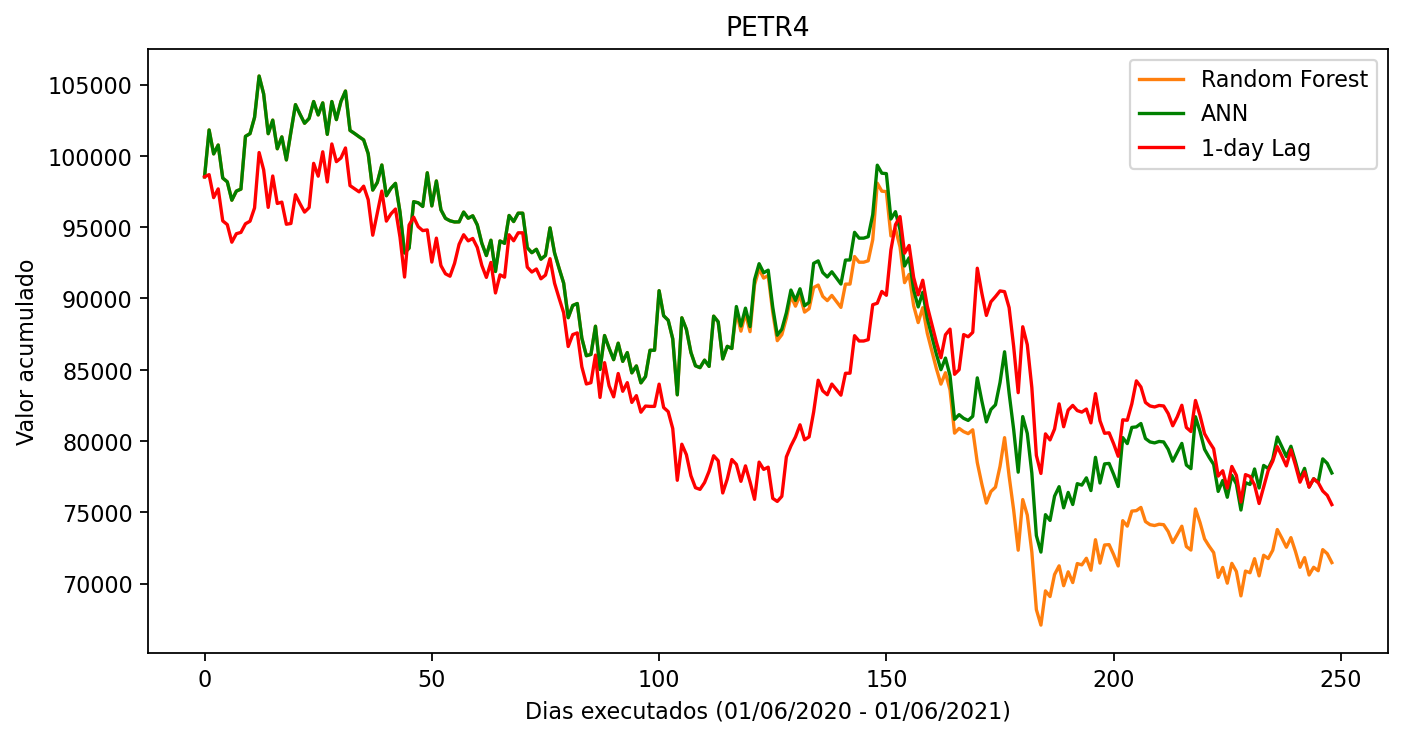

<function matplotlib.pyplot.clf()>

In [13]:
plt.figure(figsize=(10,5),dpi = 160)


#plt.plot(dfs[i].index, dfs[i]['low_bench'], label = "1-day Lag", linestyle=":")
#tst = petrDaily['profit'].cumsum()
#plt.figure();
#tst.plot();

petrOrders, petrDaily, petrDD, petrDDmax, petrAR, petrBR, petrMeanTrades = runStrategy(pred_PETR4, initialDf_PETR4, 100000, 0.001, 0.0,3)
print('Accuracy: '+str(round(100*len(petrOrders[petrOrders['profit'] > 0].index)/len(petrOrders.index), 2)))

print('Brute Return: '+str(petrBR) + 
      '\nAnnual Return:' +str(petrAR)+
      '\nMax DD: '+ str(petrDDmax)+
      '\nMean Trades: '+ str(petrMeanTrades)+
      '\n#####################################'
     )

plt.plot(petrDaily.index, petrDaily['Amount'], label = "Random Forest", color='tab:orange')

petrOrders, petrDaily, petrDD, petrDDmax, petrAR, petrBR, petrMeanTrades = runStrategy(pred_PETR4, initialDf_PETR4, 100000, 0.001, 0.0,2)
print('Accuracy: '+str(round(100*len(petrOrders[petrOrders['profit'] > 0].index)/len(petrOrders.index), 2)))

print('Brute Return: '+str(petrBR) + 
      '\nAnnual Return:' +str(petrAR)+
      '\nMax DD: '+ str(petrDDmax)+
      '\nMean Trades: '+ str(petrMeanTrades)+
      '\n#####################################'
     )

plt.plot(petrDaily.index, petrDaily['Amount'], label = "ANN", color='g')

petrOrders, petrDaily, petrDD, petrDDmax, petrAR, petrBR, petrMeanTrades = runStrategy(pred_PETR4, initialDf_PETR4, 100000, 0.001, 0.0,1)
print('Accuracy: '+str(round(100*len(petrOrders[petrOrders['profit'] > 0].index)/len(petrOrders.index), 2)))

print('Brute Return: '+str(petrBR) + 
      '\nAnnual Return:' +str(petrAR)+
      '\nMax DD: '+ str(petrDDmax)+
      '\nMean Trades: '+ str(petrMeanTrades)+
      '\n#####################################'
     )

plt.plot(petrDaily.index, petrDaily['Amount'], label = "1-day Lag", color='r')

plt.title('PETR4')
plt.legend()
plt.xlabel("Dias executados (01/06/2020 - 01/06/2021)")
plt.ylabel("Valor acumulado")
plt.savefig('../../Images/General_petr4.png')

plt.show()
plt.clf

#### Vale Testing

Accuracy: 37.88
Brute Return: 98290.0
Annual Return:-1.71
Max DD: 18.37
Mean Trades: 7.35
#####################################
Accuracy: 36.19
Brute Return: 91871.0
Annual Return:-8.13
Max DD: 24.08
Mean Trades: 7.14
#####################################
Accuracy: 27.82
Brute Return: 101869.0
Annual Return:1.87
Max DD: 24.14
Mean Trades: 5.25
#####################################


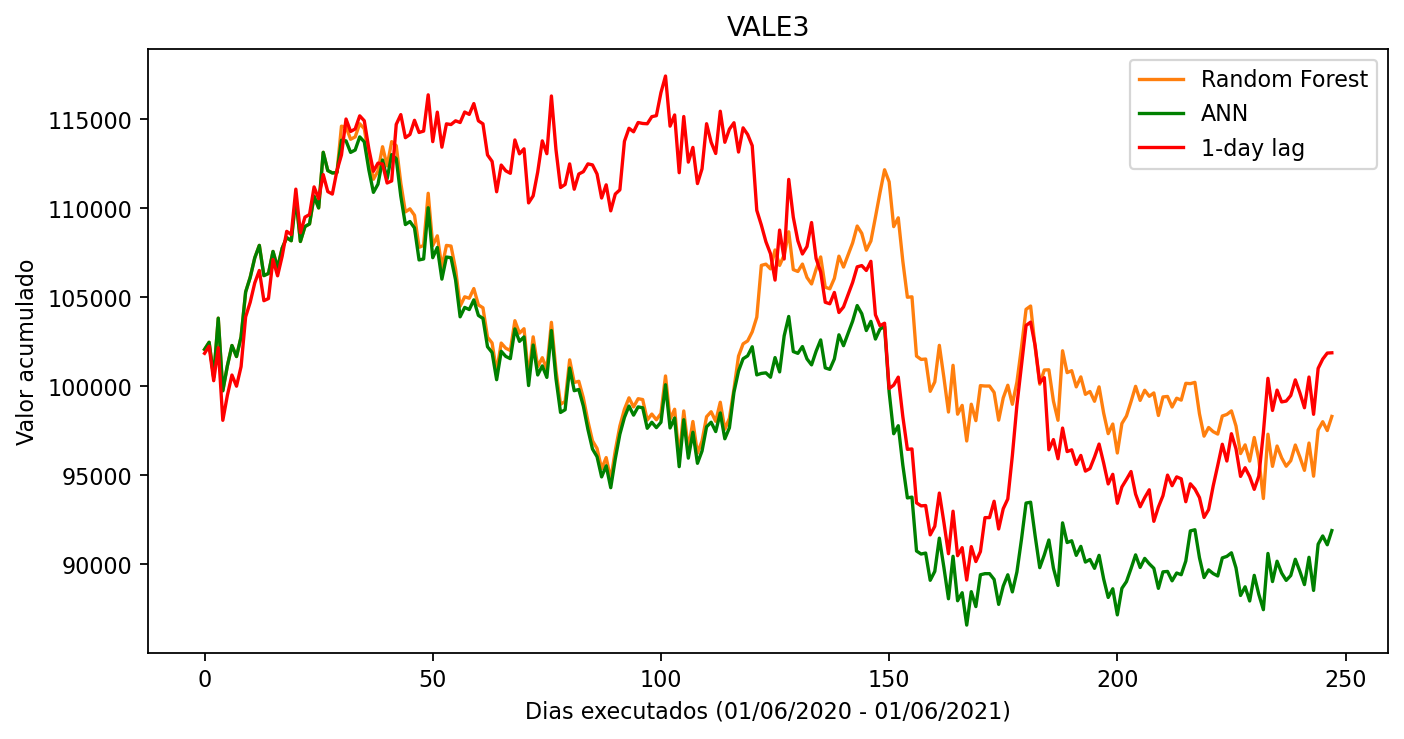

<function matplotlib.pyplot.clf()>

In [14]:
plt.figure(figsize=(10,5),dpi = 160)

valeOrders, valeDaily, valeDD, valeDDmax, valeAR, valeBR, valeMeanTrades = runStrategy(pred_VALE3, initialDf_VALE3, 100000, 0.001, 0.0,3)
print('Accuracy: '+str(round(100*len(valeOrders[valeOrders['profit'] > 0].index)/len(valeOrders.index), 2)))

print('Brute Return: '+str(valeBR) + 
      '\nAnnual Return:' +str(valeAR)+
      '\nMax DD: '+ str(valeDDmax)+
      '\nMean Trades: '+ str(valeMeanTrades)+
      '\n#####################################'
     )

plt.plot(valeDaily.index, valeDaily['Amount'], label = "Random Forest", color='tab:orange')

valeOrders, valeDaily, valeDD, valeDDmax, valeAR, valeBR, valeMeanTrades = runStrategy(pred_VALE3, initialDf_VALE3, 100000, 0.001, 0.0,2)
print('Accuracy: '+str(round(100*len(valeOrders[valeOrders['profit'] > 0].index)/len(valeOrders.index), 2)))

print('Brute Return: '+str(valeBR) + 
      '\nAnnual Return:' +str(valeAR)+
      '\nMax DD: '+ str(valeDDmax)+
      '\nMean Trades: '+ str(valeMeanTrades)+
      '\n#####################################'
     )

plt.plot(valeDaily.index, valeDaily['Amount'], label = "ANN", color='g')

valeOrders, valeDaily, valeDD, valeDDmax, valeAR, valeBR, valeMeanTrades = runStrategy(pred_VALE3, initialDf_VALE3, 100000, 0.001, 0.0,1)
print('Accuracy: '+str(round(100*len(valeOrders[valeOrders['profit'] > 0].index)/len(valeOrders.index), 2)))

print('Brute Return: '+str(valeBR) + 
      '\nAnnual Return:' +str(valeAR)+
      '\nMax DD: '+ str(valeDDmax)+
      '\nMean Trades: '+ str(valeMeanTrades)+
      '\n#####################################'
     )

plt.plot(valeDaily.index, valeDaily['Amount'], label = "1-day lag", color='r')



plt.title('VALE3')
plt.legend()
plt.xlabel("Dias executados (01/06/2020 - 01/06/2021)")
plt.ylabel("Valor acumulado")
plt.savefig('../../Images/General_Vale3.png')
plt.show()
plt.clf


#### PETR TESTING 2

Accuracy: 46.46
Brute Return: 127355.0
Annual Return:27.38
Max DD: 14.69
Mean Trades: 14.4
#####################################
Accuracy: 45.35
Brute Return: 139738.0
Annual Return:39.77
Max DD: 14.13
Mean Trades: 11.88
#####################################
Accuracy: 45.85
Brute Return: 125633.0
Annual Return:25.65
Max DD: 16.6
Mean Trades: 13.44
#####################################


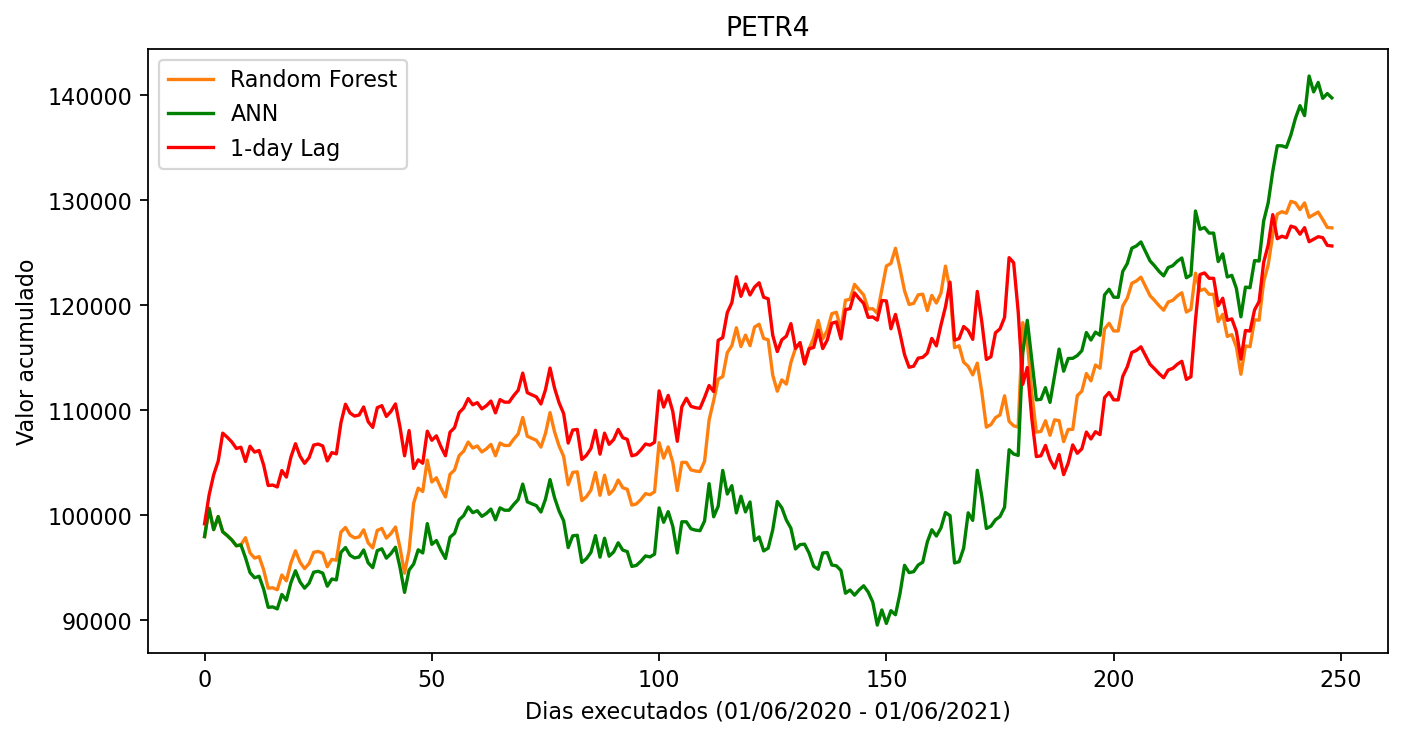

<function matplotlib.pyplot.clf()>

In [22]:
plt.figure(figsize=(10,5),dpi = 160)

#plt.plot(dfs[i].index, dfs[i]['low_bench'], label = "1-day Lag", linestyle=":")
#tst = petrDaily['profit'].cumsum()
#plt.figure();
#tst.plot();

petrOrders, petrDaily, petrDD, petrDDmax, petrAR, petrBR, petrMeanTrades = runStrategy(pred_PETR4, initialDf_PETR4, 100000, 0.001, 0.5, 0.1,3)
print('Accuracy: '+str(round(100*len(petrOrders[petrOrders['profit'] > 0].index)/len(petrOrders.index), 2)))

print('Brute Return: '+str(petrBR) + 
      '\nAnnual Return:' +str(petrAR)+
      '\nMax DD: '+ str(petrDDmax)+
      '\nMean Trades: '+ str(petrMeanTrades)+
      '\n#####################################'
     )

plt.plot(petrDaily.index, petrDaily['Amount'], label = "Random Forest", color='tab:orange')

petrOrders, petrDaily, petrDD, petrDDmax, petrAR, petrBR, petrMeanTrades = runStrategy(pred_PETR4, initialDf_PETR4, 100000, 0.001, 0.5, 0.0,2)
print('Accuracy: '+str(round(100*len(petrOrders[petrOrders['profit'] > 0].index)/len(petrOrders.index), 2)))

print('Brute Return: '+str(petrBR) + 
      '\nAnnual Return:' +str(petrAR)+
      '\nMax DD: '+ str(petrDDmax)+
      '\nMean Trades: '+ str(petrMeanTrades)+
      '\n#####################################'
     )

plt.plot(petrDaily.index, petrDaily['Amount'], label = "ANN", color='g')

petrOrders, petrDaily, petrDD, petrDDmax, petrAR, petrBR, petrMeanTrades = runStrategy(pred_PETR4, initialDf_PETR4, 100000, 0.001, 0.2, 0.1,1)
print('Accuracy: '+str(round(100*len(petrOrders[petrOrders['profit'] > 0].index)/len(petrOrders.index), 2)))

print('Brute Return: '+str(petrBR) + 
      '\nAnnual Return:' +str(petrAR)+
      '\nMax DD: '+ str(petrDDmax)+
      '\nMean Trades: '+ str(petrMeanTrades)+
      '\n#####################################'
     )

plt.plot(petrDaily.index, petrDaily['Amount'], label = "1-day Lag", color='r')

plt.title('PETR4')
plt.legend()
plt.xlabel("Dias executados (01/06/2020 - 01/06/2021)")
plt.ylabel("Valor acumulado")
plt.savefig('../../Images/Improved_petr4.png')

plt.show()
plt.clf

#### VALE TESTING 2

Accuracy: 25.95
Brute Return: 156490.0
Annual Return:56.54
Max DD: 9.5
Mean Trades: 3.08
#####################################
Accuracy: 24.77
Brute Return: 156217.0
Annual Return:56.26
Max DD: 24.09
Mean Trades: 3.5
#####################################
Accuracy: 25.53
Brute Return: 153964.0
Annual Return:54.01
Max DD: 14.13
Mean Trades: 3.4
#####################################


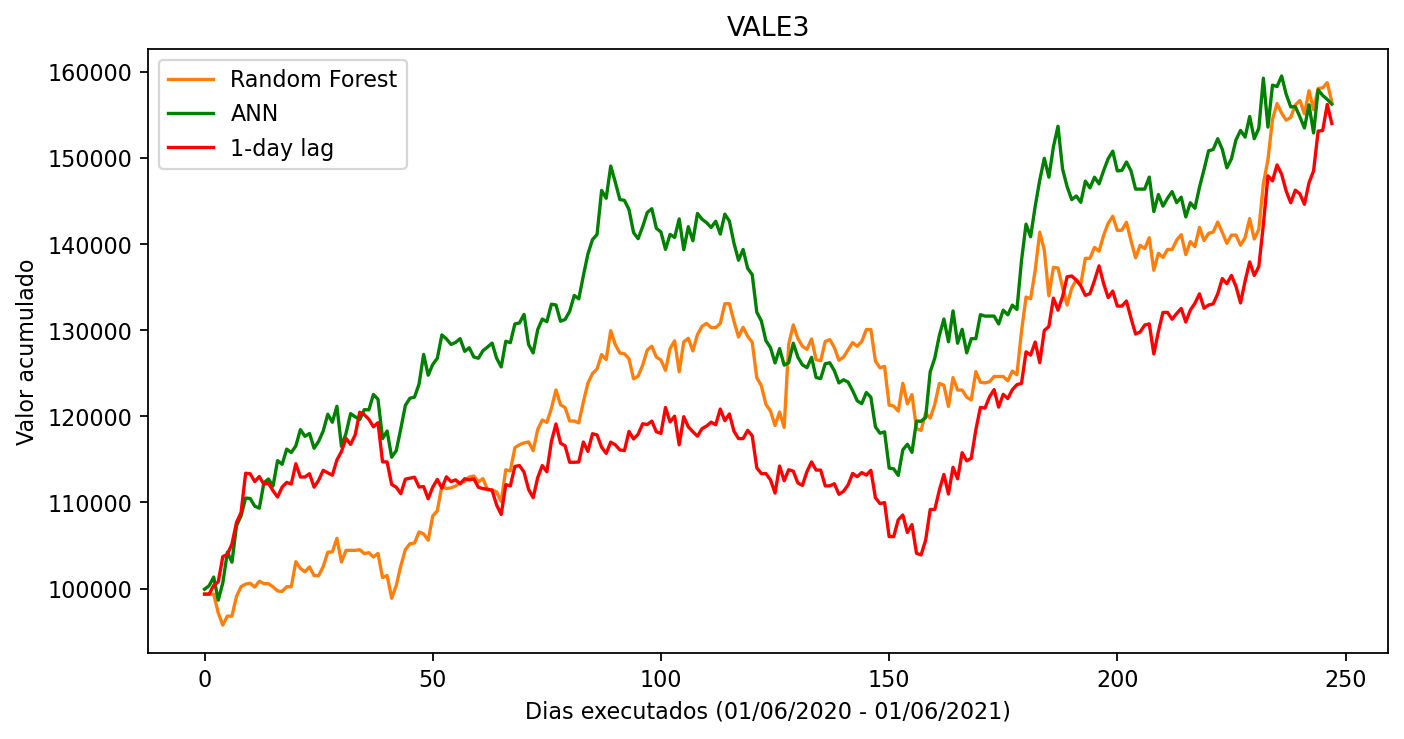

<function matplotlib.pyplot.clf()>

In [16]:
plt.figure(figsize=(10,5),dpi = 160)

valeOrders, valeDaily, valeDD, valeDDmax, valeAR, valeBR, valeMeanTrades = runStrategy(pred_VALE3, initialDf_VALE3, 100000, 0.001, 0.2, 0.1,3)
print('Accuracy: '+str(round(100*len(valeOrders[valeOrders['profit'] > 0].index)/len(valeOrders.index), 2)))

print('Brute Return: '+str(valeBR) + 
      '\nAnnual Return:' +str(valeAR)+
      '\nMax DD: '+ str(valeDDmax)+
      '\nMean Trades: '+ str(valeMeanTrades)+
      '\n#####################################'
     )

plt.plot(valeDaily.index, valeDaily['Amount'], label = "Random Forest", color='tab:orange')

valeOrders, valeDaily, valeDD, valeDDmax, valeAR, valeBR, valeMeanTrades = runStrategy(pred_VALE3, initialDf_VALE3, 100000, 0.001,0.0, 0.4,2)
print('Accuracy: '+str(round(100*len(valeOrders[valeOrders['profit'] > 0].index)/len(valeOrders.index), 2)))

print('Brute Return: '+str(valeBR) + 
      '\nAnnual Return:' +str(valeAR)+
      '\nMax DD: '+ str(valeDDmax)+
      '\nMean Trades: '+ str(valeMeanTrades)+
      '\n#####################################'
     )

plt.plot(valeDaily.index, valeDaily['Amount'], label = "ANN", color='g')

valeOrders, valeDaily, valeDD, valeDDmax, valeAR, valeBR, valeMeanTrades = runStrategy(pred_VALE3, initialDf_VALE3, 100000, 0.001, 0.0, 0.4,1)
print('Accuracy: '+str(round(100*len(valeOrders[valeOrders['profit'] > 0].index)/len(valeOrders.index), 2)))

print('Brute Return: '+str(valeBR) + 
      '\nAnnual Return:' +str(valeAR)+
      '\nMax DD: '+ str(valeDDmax)+
      '\nMean Trades: '+ str(valeMeanTrades)+
      '\n#####################################'
     )

plt.plot(valeDaily.index, valeDaily['Amount'], label = "1-day lag", color='r')



plt.title('VALE3')
plt.legend()
plt.xlabel("Dias executados (01/06/2020 - 01/06/2021)")
plt.ylabel("Valor acumulado")
plt.savefig('../../Images/Improved_Vale3.png')
plt.show()
plt.clf

#### PETR4 TESTING 3

Accuracy: 44.36
Brute Return: 117315.0
Annual Return:17.33
Max DD: 14.87
Mean Trades: 7.72
#####################################
Accuracy: 45.91
Brute Return: 144231.0
Annual Return:44.27
Max DD: 14.4
Mean Trades: 7.7
#####################################
Accuracy: 45.97
Brute Return: 143302.0
Annual Return:43.34
Max DD: 12.83
Mean Trades: 8.21
#####################################


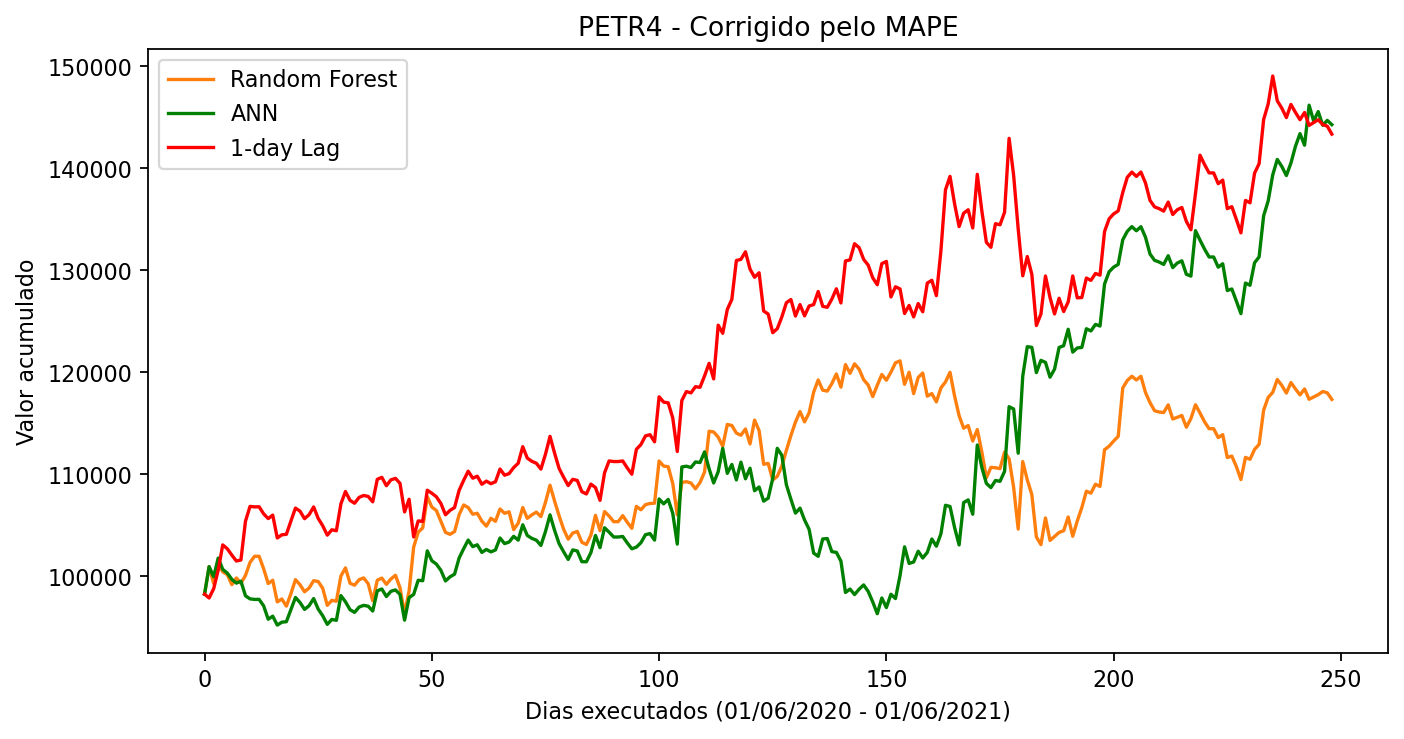

<function matplotlib.pyplot.clf()>

In [45]:
plt.figure(figsize=(10,5),dpi = 160)

#plt.plot(dfs[i].index, dfs[i]['low_bench'], label = "1-day Lag", linestyle=":")
#tst = petrDaily['profit'].cumsum()
#plt.figure();
#tst.plot();

##### STD MAX = 1,06 + 0,98 STD MIN = 1,05+0,95
petrOrders, petrDaily, petrDD, petrDDmax, petrAR, petrBR, petrMeanTrades = runStrategy(pred_PETR4, initialDf_PETR4, 100000, 0.001, 0.02, 0.02,3)
print('Accuracy: '+str(round(100*len(petrOrders[petrOrders['profit'] > 0].index)/len(petrOrders.index), 2)))

print('Brute Return: '+str(petrBR) + 
      '\nAnnual Return:' +str(petrAR)+
      '\nMax DD: '+ str(petrDDmax)+
      '\nMean Trades: '+ str(petrMeanTrades)+
      '\n#####################################'
     )

plt.plot(petrDaily.index, petrDaily['Amount'], label = "Random Forest", color='tab:orange')


##### STD MAX = 5,21 + 6,39 STD MIN = 4,94+6,66
petrOrders, petrDaily, petrDD, petrDDmax, petrAR, petrBR, petrMeanTrades = runStrategy(pred_PETR4, initialDf_PETR4, 100000, 0.001, 0.1, 0.1,2)
print('Accuracy: '+str(round(100*len(petrOrders[petrOrders['profit'] > 0].index)/len(petrOrders.index), 2)))

print('Brute Return: '+str(petrBR) + 
      '\nAnnual Return:' +str(petrAR)+
      '\nMax DD: '+ str(petrDDmax)+
      '\nMean Trades: '+ str(petrMeanTrades)+
      '\n#####################################'
     )

plt.plot(petrDaily.index, petrDaily['Amount'], label = "ANN", color='g')


##### STD MAX = 1,74 + 2,04 STD MIN = 1,84 + 2,27
petrOrders, petrDaily, petrDD, petrDDmax, petrAR, petrBR, petrMeanTrades = runStrategy(pred_PETR4, initialDf_PETR4, 100000, 0.001, 0.04, 0.04,1)
print('Accuracy: '+str(round(100*len(petrOrders[petrOrders['profit'] > 0].index)/len(petrOrders.index), 2)))

print('Brute Return: '+str(petrBR) + 
      '\nAnnual Return:' +str(petrAR)+
      '\nMax DD: '+ str(petrDDmax)+
      '\nMean Trades: '+ str(petrMeanTrades)+
      '\n#####################################'
     )

plt.plot(petrDaily.index, petrDaily['Amount'], label = "1-day Lag", color='r')

plt.title('PETR4 - Corrigido pelo MAPE')
plt.legend()
plt.xlabel("Dias executados (01/06/2020 - 01/06/2021)")
plt.ylabel("Valor acumulado")
plt.savefig('../../Images/Improved2_petr4.png')

plt.show()
plt.clf

#### VALE TESTING 3

Accuracy: 40.8
Brute Return: 156260.0
Annual Return:56.31
Max DD: 12.53
Mean Trades: 5.83
#####################################
Accuracy: 38.47
Brute Return: 138092.0
Annual Return:38.12
Max DD: 19.51
Mean Trades: 4.81
#####################################
Accuracy: 38.8
Brute Return: 136487.0
Annual Return:36.52
Max DD: 14.55
Mean Trades: 5.71
#####################################


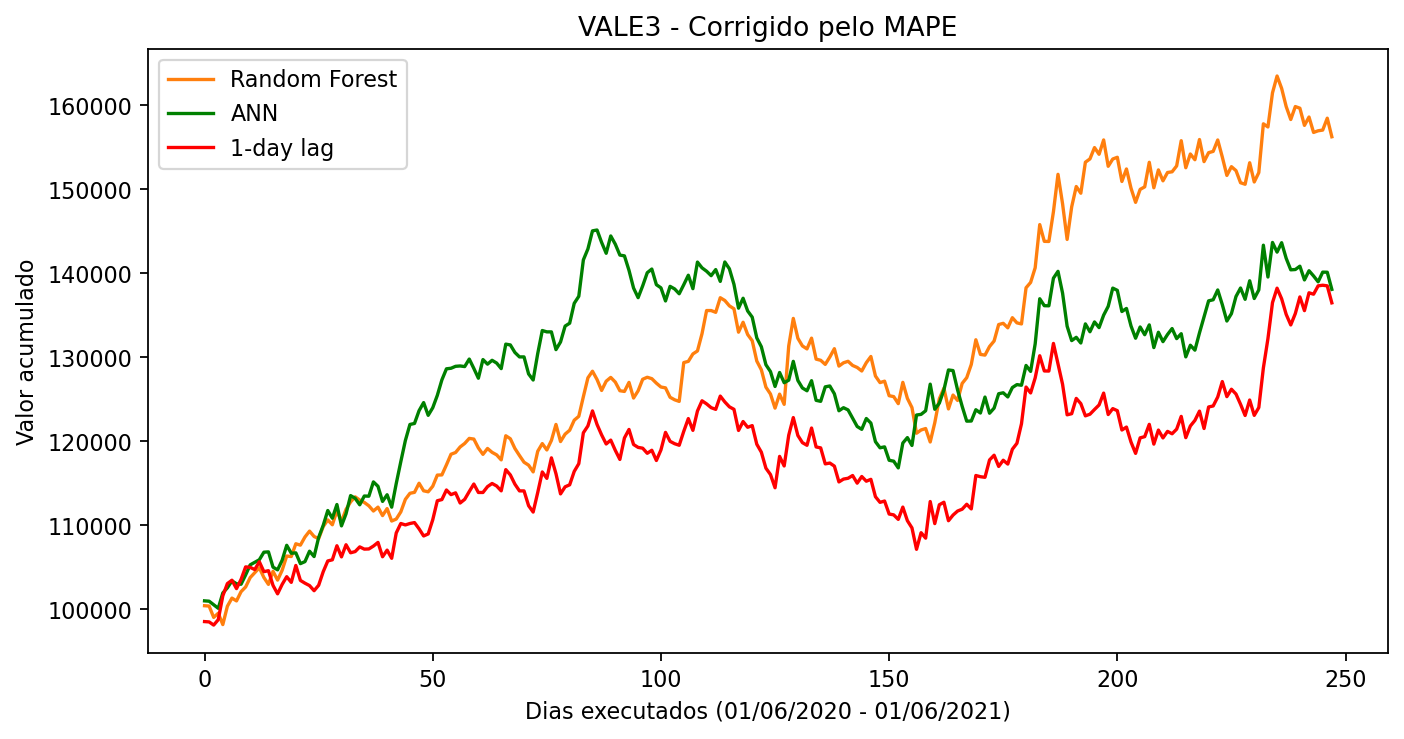

<function matplotlib.pyplot.clf()>

In [46]:
plt.figure(figsize=(10,5),dpi = 160)

##### STD MAX = 1,17 + 1,15 STD MIN = 1,16+0,98
valeOrders, valeDaily, valeDD, valeDDmax, valeAR, valeBR, valeMeanTrades = runStrategy(pred_VALE3, initialDf_VALE3, 100000, 0.001, 0.023, 0.021,3)
print('Accuracy: '+str(round(100*len(valeOrders[valeOrders['profit'] > 0].index)/len(valeOrders.index), 2)))

print('Brute Return: '+str(valeBR) + 
      '\nAnnual Return:' +str(valeAR)+
      '\nMax DD: '+ str(valeDDmax)+
      '\nMean Trades: '+ str(valeMeanTrades)+
      '\n#####################################'
     )

plt.plot(valeDaily.index, valeDaily['Amount'], label = "Random Forest", color='tab:orange')

##### STD MAX = 4,02 + 6,63 STD MIN = 3,98+6,61
valeOrders, valeDaily, valeDD, valeDDmax, valeAR, valeBR, valeMeanTrades = runStrategy(pred_VALE3, initialDf_VALE3, 100000, 0.001,0.11, 0.11,2)
print('Accuracy: '+str(round(100*len(valeOrders[valeOrders['profit'] > 0].index)/len(valeOrders.index), 2)))

print('Brute Return: '+str(valeBR) + 
      '\nAnnual Return:' +str(valeAR)+
      '\nMax DD: '+ str(valeDDmax)+
      '\nMean Trades: '+ str(valeMeanTrades)+
      '\n#####################################'
     )

plt.plot(valeDaily.index, valeDaily['Amount'], label = "ANN", color='g')

##### STD MAX = 1,26 + 1,06 STD MIN = 1,31 + 1,03
valeOrders, valeDaily, valeDD, valeDDmax, valeAR, valeBR, valeMeanTrades = runStrategy(pred_VALE3, initialDf_VALE3, 100000, 0.001, 0.023, 0.023,1)
print('Accuracy: '+str(round(100*len(valeOrders[valeOrders['profit'] > 0].index)/len(valeOrders.index), 2)))

print('Brute Return: '+str(valeBR) + 
      '\nAnnual Return:' +str(valeAR)+
      '\nMax DD: '+ str(valeDDmax)+
      '\nMean Trades: '+ str(valeMeanTrades)+
      '\n#####################################'
     )

plt.plot(valeDaily.index, valeDaily['Amount'], label = "1-day lag", color='r')

plt.title('VALE3 - Corrigido pelo MAPE')
plt.legend()
plt.xlabel("Dias executados (01/06/2020 - 01/06/2021)")
plt.ylabel("Valor acumulado")
plt.savefig('../../Images/Improved2_Vale3.png')
plt.show()
plt.clf

Accuracy: 24.7
Brute Return: 105212.0
Annual Return:5.22
Max DD: 17.68
Mean Trades: 2.0
0.0 - 0.0
#####################################
Accuracy: 25.04
Brute Return: 130919.0
Annual Return:30.94
Max DD: 6.87
Mean Trades: 2.28
0.0 - 0.1
#####################################
Accuracy: 24.57
Brute Return: 111510.0
Annual Return:11.52
Max DD: 16.39
Mean Trades: 2.58
0.0 - 0.2
#####################################
Accuracy: 23.01
Brute Return: 96266.0
Annual Return:-3.74
Max DD: 19.77
Mean Trades: 3.02
0.0 - 0.3
#####################################
Accuracy: 22.18
Brute Return: 95727.0
Annual Return:-4.28
Max DD: 25.42
Mean Trades: 3.42
0.0 - 0.4
#####################################
Accuracy: 22.16
Brute Return: 99481.0
Annual Return:-0.52
Max DD: 21.24
Mean Trades: 3.9
0.0 - 0.5
#####################################
Accuracy: 24.6
Brute Return: 107744.0
Annual Return:7.75
Max DD: 12.06
Mean Trades: 2.27
0.1 - 0.0
#####################################
Accuracy: 24.88
Brute Return: 133913.

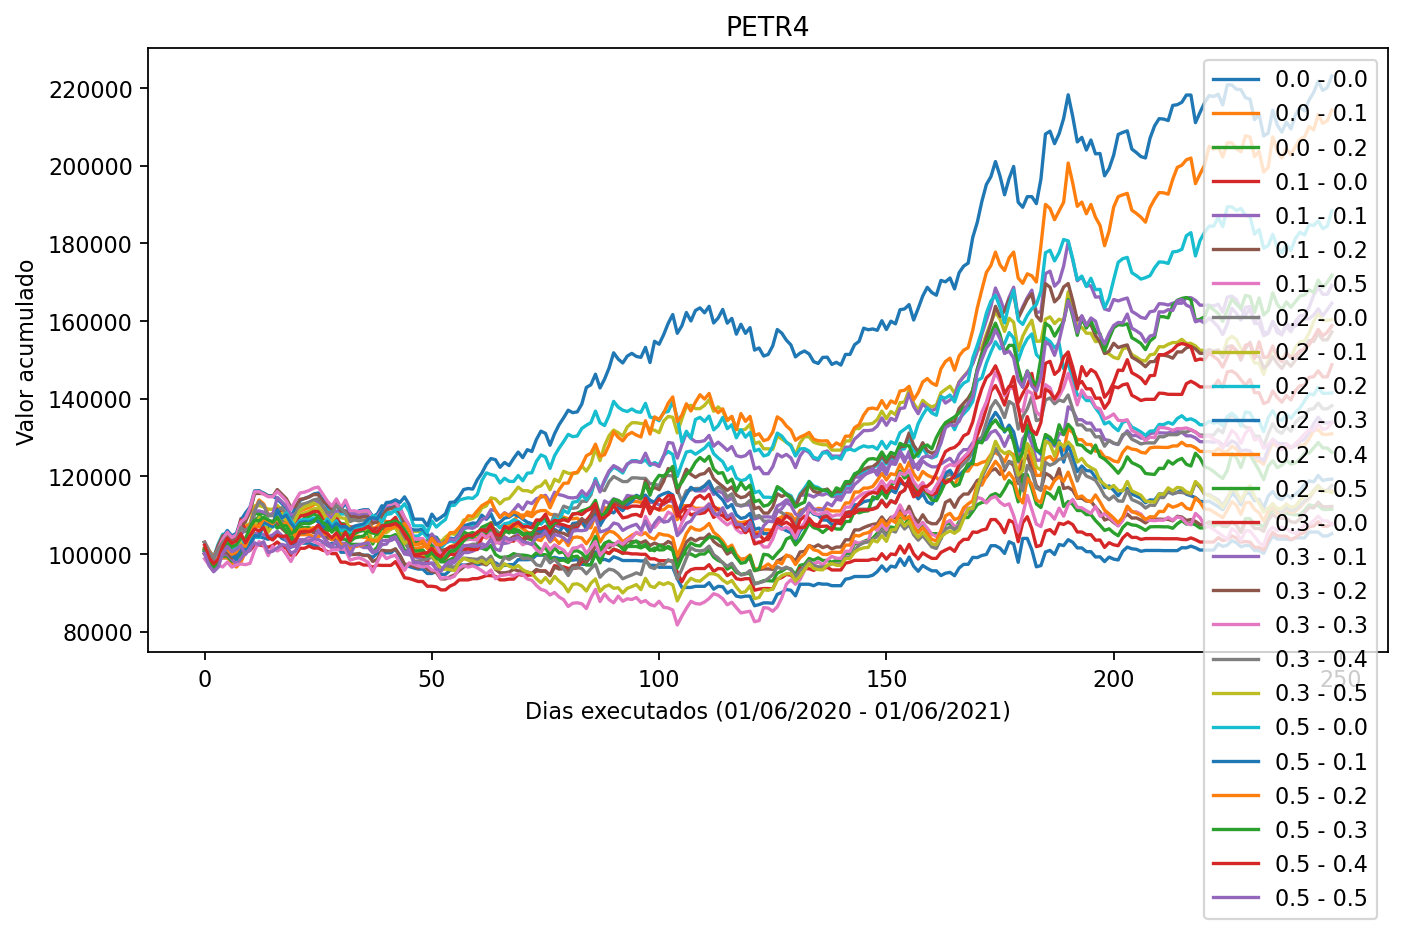

<function matplotlib.pyplot.clf()>

In [17]:
plt.figure(figsize=(10,5),dpi = 160)

for i in [0.0, 0.1, 0.2, 0.3, 0.5]:
    for j in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]:
        
        petrOrders, petrDaily, petrDD, petrDDmax, petrAR, petrBR, petrMeanTrades = runStrategy(pred_PETR4, initialDf_PETR4, 100000, 0.001, i, j,3)
        print('Accuracy: '+str(round(100*len(petrOrders[petrOrders['profit'] > 0].index)/len(petrOrders.index), 2)))

        print('Brute Return: '+str(petrBR) + 
              '\nAnnual Return:' +str(petrAR)+
              '\nMax DD: '+ str(petrDDmax)+
              '\nMean Trades: '+ str(petrMeanTrades)+
              '\n' + str(i)+ ' - '+str(j)+
              '\n#####################################'
             )
        
        if(petrBR > 102000.0):
            plt.plot(petrDaily.index, petrDaily['Amount'], label = str(i)+ ' - '+str(j))

plt.title('PETR4')
plt.legend()
plt.xlabel("Dias executados (01/06/2020 - 01/06/2021)")
plt.ylabel("Valor acumulado")
plt.savefig('../../Images/bruteforce_Improved_PETR4.png')
plt.show()
plt.clf

In [18]:
#display(testPetr.loc[0:25].head(60))
display(petrDaily.head(2))
display(petrDaily[petrDaily['trades']>2].head(2))

,day,date,trades,profit,Amount
0,0,2020.06.01,7,110.0,100110.0
1,1,2020.06.02,8,-3149.0,96961.0


,day,date,trades,profit,Amount
0,0,2020.06.01,7,110.0,100110.0
1,1,2020.06.02,8,-3149.0,96961.0


In [19]:
display(valeOrders.loc[80:].tail(1))

,date,batches,time_op1,op1,value_op1,time_op2,op2,value_op2,profit,totalProfit,stop,Amount,max,min
841,2021.05.31,13,11:15:00,Sell,114.63,16:45:00,Buy,114.78,-0.15,-195.0,True,153964.0,112.75,110.752


In [20]:
df = testValeDaily
length = len(df.index)

tst = df['profit'].cumsum()
plt.figure();
tst.plot();
plt.savefig('a.png')

plt

#df = testPetrDaily
#tst = df['profit'].cumsum()
#plt.figure();
#tst.plot();


     
aux1,aux2 = calculateDrawdown(testValeDaily)
display(aux1)
print(aux2)
aux1,aux2 = calculateDrawdown(testPetrDaily)
display(aux1)
print(aux2)

NameError: name 'testValeDaily' is not defined